In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Advertising.csv')


# Compute and Display Summary Statistics

In [4]:
# Summary statistics for numerical features
summary_stats = df.describe().transpose()

In [5]:
# Calculate range (max - min)
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

In [6]:
# Calculate variance
summary_stats['variance'] = df.var()

In [8]:
summary_stats['25th_percentile'] = df.quantile(0.25)
summary_stats['50th_percentile'] = df.quantile(0.50)
summary_stats['75th_percentile'] = df.quantile(0.75)

# Display summary statistics
print(summary_stats)

            count      mean        std  min     25%     50%      75%    max  \
Unnamed: 0  200.0  100.5000  57.879185  1.0  50.750  100.50  150.250  200.0   
TV          200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4   
Radio       200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6   
Newspaper   200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0   
Sales       200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0   

            range     variance  25th_percentile  50th_percentile  \
Unnamed: 0  199.0  3350.000000           50.750           100.50   
TV          295.7  7370.949893           74.375           149.75   
Radio        49.6   220.427743            9.975            22.90   
Newspaper   113.7   474.308326           12.750            25.75   
Sales        25.4    27.221853           10.375            12.90   

            75th_percentile  
Unnamed: 0          150.250  
TV                  218.825  
Radio                36.52

# Data **Visualizing**

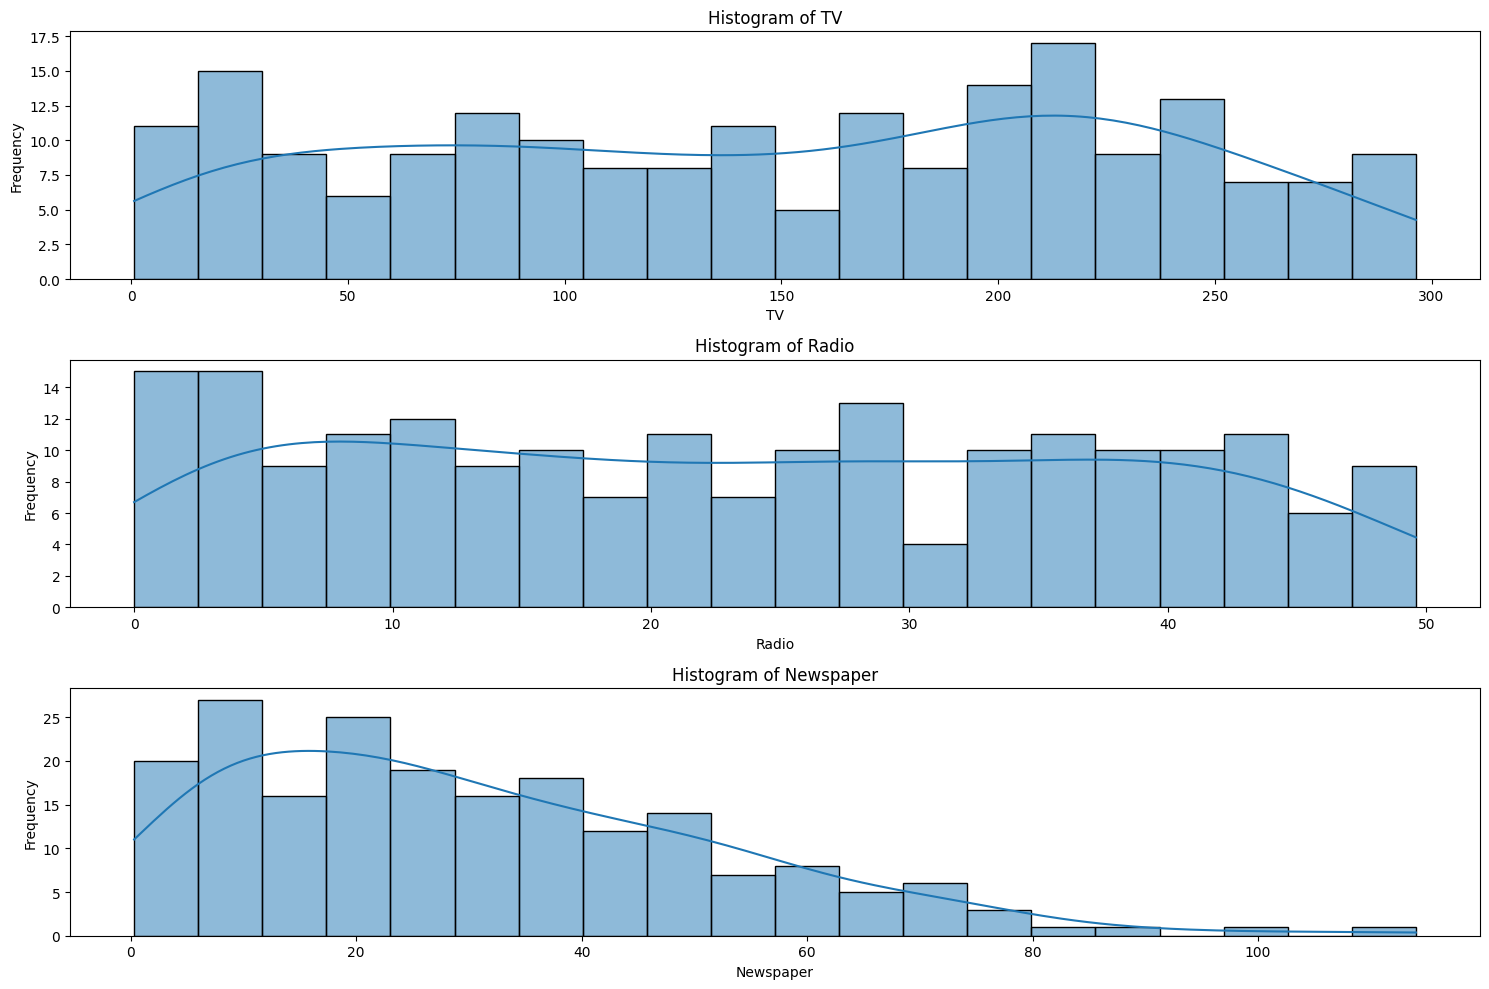

In [9]:
# Set up the size of the plots
plt.figure(figsize=(15, 10))

# Create histograms for each feature (TV, Radio, Newspaper)
for i, column in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(3, 1, i + 1)  # subplot for each feature
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Data **Cleaning**

In [10]:
# Check for missing values
print(df.isnull().sum())

# If there are any missing values, you can fill them with the mean (for example)
df.fillna(df.mean(), inplace=True)

# Drop duplicates if any exist
df.drop_duplicates(inplace=True)

# Display cleaned dataset
print(df.head())


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# Data Transformation (Normalization)

In [11]:
# Normalize numerical columns
scaler = StandardScaler()
df[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])

# Display transformed dataset
print(df.head())


   Unnamed: 0        TV     Radio  Newspaper  Sales
0           1  0.969852  0.981522   1.778945   22.1
1           2 -1.197376  1.082808   0.669579   10.4
2           3 -1.516155  1.528463   1.783549    9.3
3           4  0.052050  1.217855   1.286405   18.5
4           5  0.394182 -0.841614   1.281802   12.9


# Build a Regression Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5274750749999999


# Visualize Actual vs Predicted Sales

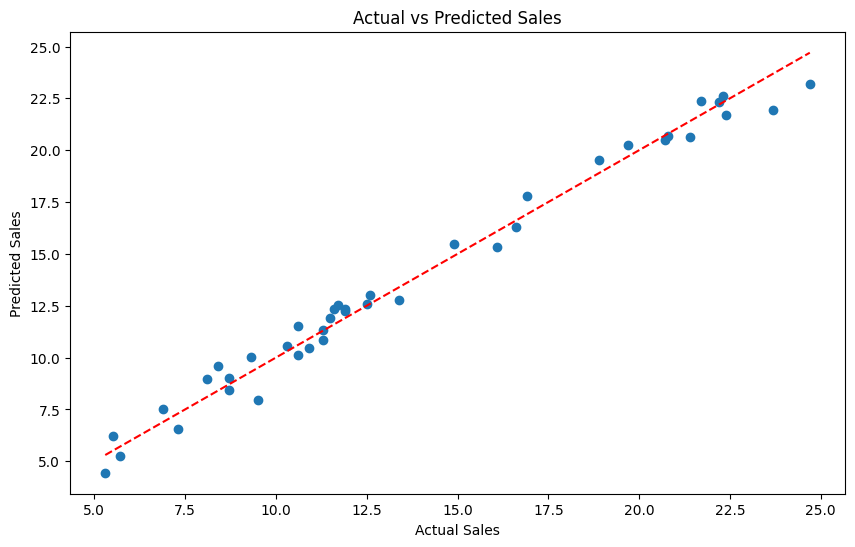

In [15]:
# Plotting Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
